<a href="https://colab.research.google.com/github/kyle123088/Red-Wine-Quality/blob/main/%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code (選用資料)


---

https://ithelp.ithome.com.tw/articles/10272586 (隨機森林)


---
https://ithelp.ithome.com.tw/articles/10187569 (隨機森林與支持向量機)

https://blog.csdn.net/u013884777/article/details/81169008

https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b

---
https://ithelp.ithome.com.tw/articles/10283392 (不平衡資料)

In [15]:
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

--2024-03-13 08:18:42--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  29.5MB/s    in 4.7s    

2024-03-13 08:18:48 (24.7 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.otf  

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from matplotlib.font_manager import FontProperties as font
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
from sklearn.metrics import accuracy_score
from sklearn import svm
font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"

In [17]:
data=pd.read_csv("winequality-red.csv")
data.columns = ["固定酸度","揮發性酸度","檸檬酸","殘餘糖分","氯化物","游離二氧化硫","二氧化硫總量","密度","酸鹼度","硫酸鹽","酒精","品質"]
data.head()

,固定酸度,揮發性酸度,檸檬酸,殘餘糖分,氯化物,游離二氧化硫,二氧化硫總量,密度,酸鹼度,硫酸鹽,酒精,品質
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

,固定酸度,揮發性酸度,檸檬酸,殘餘糖分,氯化物,游離二氧化硫,二氧化硫總量,密度,酸鹼度,硫酸鹽,酒精,品質
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
data.keys()
df_feat = pd.DataFrame(data)
df_feat.info()
df_feat.head()
df_feat.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   固定酸度    1599 non-null   float64
 1   揮發性酸度   1599 non-null   float64
 2   檸檬酸     1599 non-null   float64
 3   殘餘糖分    1599 non-null   float64
 4   氯化物     1599 non-null   float64
 5   游離二氧化硫  1599 non-null   float64
 6   二氧化硫總量  1599 non-null   float64
 7   密度      1599 non-null   float64
 8   酸鹼度     1599 non-null   float64
 9   硫酸鹽     1599 non-null   float64
 10  酒精      1599 non-null   float64
 11  品質      1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(1599, 12)

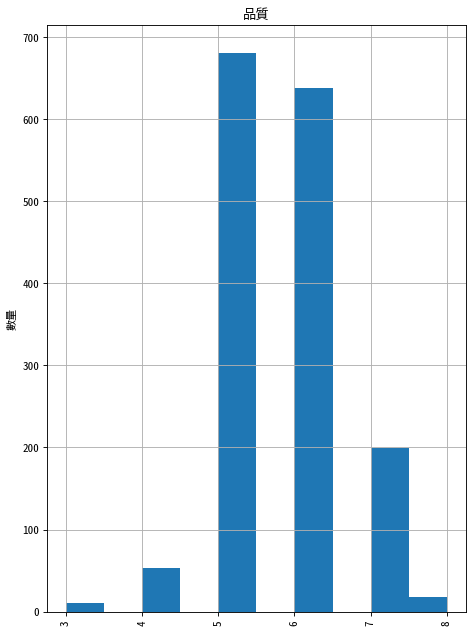

In [20]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('數量')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
plotPerColumnDistribution(data, 1, 1)

<Axes: >

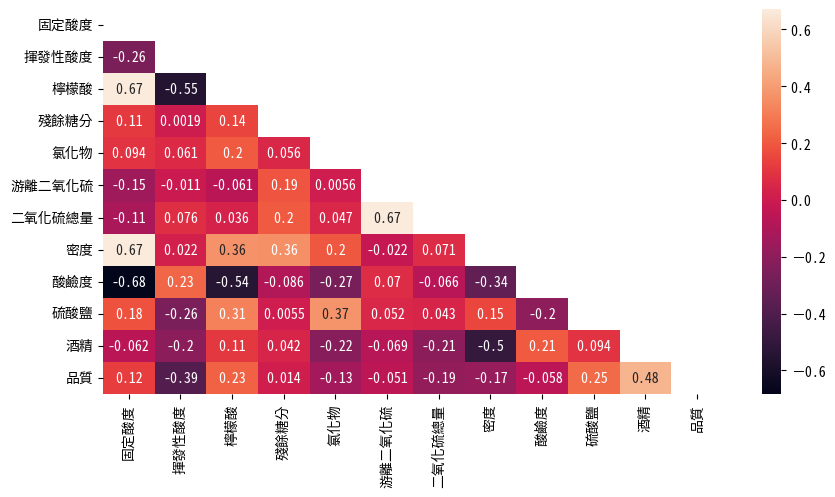

In [22]:
plt.figure(figsize=(10,5))

cor = data.corr()
mask = np.zeros_like(cor, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask=mask,annot=True)

In [23]:
cha=[0]*1599
for i in range(0,1599): # 針對每一個樣本進行調整 (winequality-red資料總共有1599筆資料)
    if(data["品質"][i]>=6.5):
        cha[i]=2
    elif(6.5>data["品質"][i]>=4):
        cha[i]=1  # 將品質大於4的樣本品質定義為1
    else:
      cha[i]=0
    data["品質"][i]=cha[i]

data.describe(percentiles=None, include=None, exclude=None)

<ipython-input-23-05d4e6ac9f61>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["品質"][i]=cha[i]


,固定酸度,揮發性酸度,檸檬酸,殘餘糖分,氯化物,游離二氧化硫,二氧化硫總量,密度,酸鹼度,硫酸鹽,酒精,品質
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,1.129456
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.353954
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,2.000000


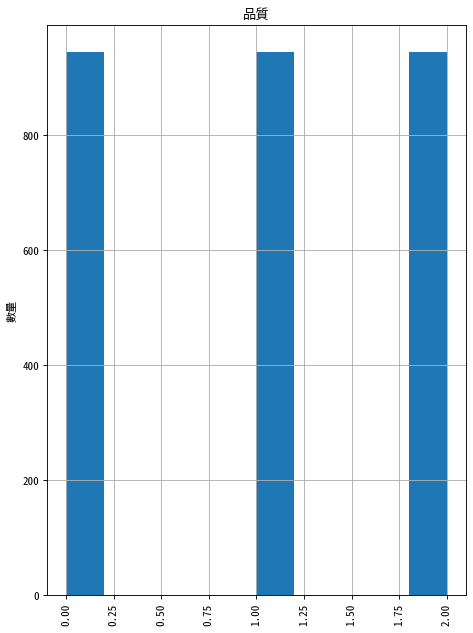

In [24]:
from collections import Counter
Y = df_feat[['品質']]
X = df_feat[['固定酸度', '揮發性酸度', '檸檬酸', '殘餘糖分', '氯化物', '游離二氧化硫', '二氧化硫總量', '密度', '酸鹼度', '硫酸鹽', '酒精']]
x_train, x_test, y_train, y_test = train_test_split(X, Y ,test_size=0.3, random_state=0)
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(random_state=0)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(x_train)
x_train_std = scale.transform(x_train)
x_test_std = scale.transform(x_test)
X_train_std_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_std, y_train)
plotPerColumnDistribution(y_train_SMOTE, 1, 1)

## 交叉驗證(SVM)

In [25]:
clf=svm.SVC(kernel='linear',C=1,gamma='auto', random_state=0)
clf.fit(X_train_std_SMOTE, y_train_SMOTE.values.ravel())
sv = clf.predict(x_test_std)

In [37]:
result_train = cross_val_score(clf, X_train_std_SMOTE, y_train_SMOTE.values.ravel(), cv=10).mean()
print(f"訓練集準確率:{result_train * 100:.2f}%")
result_test = cross_val_score(clf, x_test_std, y_test.values.ravel(), cv=10).mean()
print(f"測試集準確率:{result_test * 100:.2f}%")

訓練集準確率:84.58%
測試集準確率:88.75%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.71875


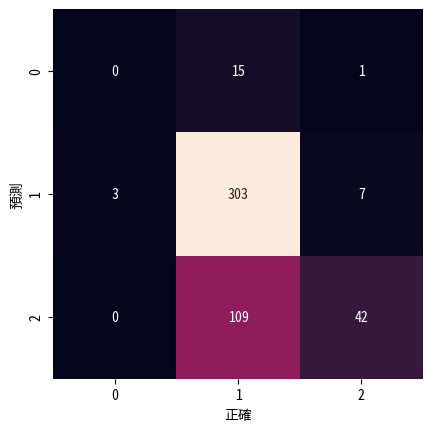

In [27]:
mat = confusion_matrix(y_test, sv)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('正確')
plt.ylabel('預測')
print("Accuracy:", (mat[0,0] + mat[1,1] + mat[2, 2]) / (mat[0,0] + mat[0,1] + mat[0,2] + mat[1,0] + mat[1,1] + mat[1,2] + mat[2,0] + mat[2,1] + mat[2,2]))

## 交叉驗證(XGBoost)

In [28]:
from xgboost import XGBClassifier
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3, random_state=0)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train_std_SMOTE, y_train_SMOTE.values.ravel())
# 使用訓練資料預測分類
xg_predicted = xgboostModel.predict(x_test_std)

In [29]:
from sklearn.model_selection import cross_val_score
result_train = cross_val_score(xgboostModel, X_train_std_SMOTE, y_train_SMOTE.values.ravel(), cv=10).mean()
print(f"訓練集準確率:{result_train * 100:.2f}%")
result_test = cross_val_score(xgboostModel, x_test_std, y_test.values.ravel(), cv=10).mean()
print(f"測試集準確率:{result_test * 100:.2f}%")

訓練集準確率:96.37%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


測試集準確率:90.00%


Accuracy: 0.8625


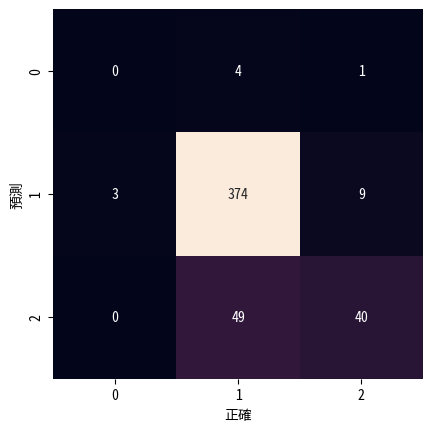

In [30]:
mat = confusion_matrix(y_test,xg_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('正確')
plt.ylabel('預測')
print("Accuracy:", (mat[0,0] + mat[1,1] + mat[2,2]) / (mat[0,0] + mat[0,1] + mat[0,2] + mat[1,0] + mat[1,1] + mat[1,2] + mat[2,0] + mat[2,1] + mat[2,2]))

## 交叉驗證(RandomForest)

In [31]:
randomForestModel = RandomForestClassifier(n_estimators=500, criterion = 'gini', random_state=0)
randomForestModel.fit(X_train_std_SMOTE, y_train_SMOTE.values.ravel())
ran_predicted = randomForestModel.predict(x_test_std)

In [32]:
from sklearn.model_selection import cross_val_score
result_train = cross_val_score(randomForestModel, X_train_std_SMOTE, y_train_SMOTE.values.ravel(), cv=10).mean()
print(f"訓練集準確率:{result_train * 100:.2f}%")
result_test = cross_val_score(randomForestModel, x_test_std, y_test.values.ravel(), cv=10).mean()
print(f"測試集準確率:{result_test * 100:.2f}%")

訓練集準確率:96.05%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


測試集準確率:89.58%


Accuracy: 0.8708333333333333


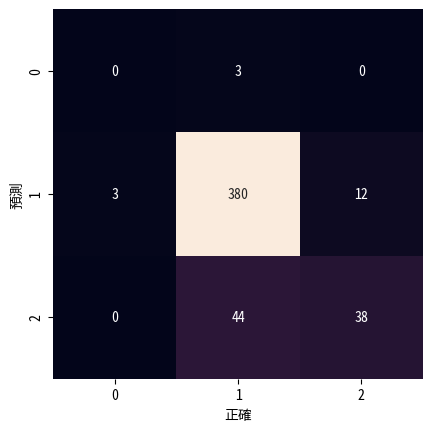

In [33]:
mat = confusion_matrix(y_test,ran_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('正確')
plt.ylabel('預測')
print("Accuracy:", (mat[0,0] + mat[1,1] + mat[2,2]) / (mat[0,0] + mat[0,1] + mat[0,2] + mat[1,0] + mat[1,1] + mat[1,2] + mat[2,0] + mat[2,1] + mat[2,2]))

Accuracy: 0.8708333333333333


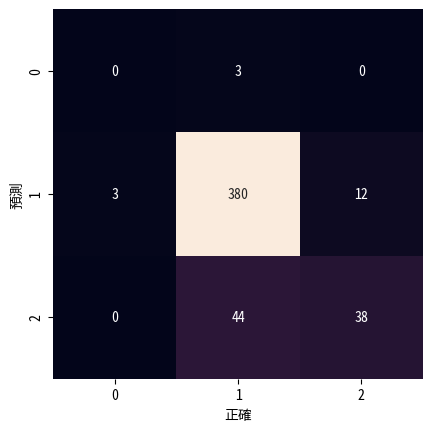

In [34]:
mat = confusion_matrix(y_test,ran_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('正確')
plt.ylabel('預測')
print("Accuracy:", (mat[0,0] + mat[1,1] + mat[2,2]) / (mat[0,0] + mat[0,1] + mat[0,2] + mat[1,0] + mat[1,1] + mat[1,2] + mat[2,0] + mat[2,1] + mat[2,2]))

In [35]:
imp=randomForestModel.feature_importances_
imp
names=x_test.columns

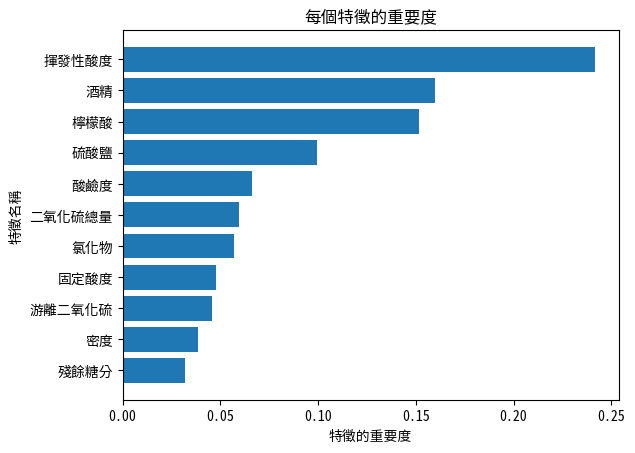

In [36]:
zip(imp,names)
imp, names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('特徵的重要度')
plt.ylabel('特徵名稱')
plt.title('每個特徵的重要度')
plt.show()